In [22]:
from processing_siniestros import process_siniestros
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
df = process_siniestros()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81107 entries, 0 to 81106
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EDAD                    81107 non-null  object
 1   COBERTURA               81107 non-null  object
 2   ENTIDAD                 81107 non-null  object
 3   CAUSA DEL SINIESTRO     81107 non-null  object
 4   PLAN DE LA POLIZA       81107 non-null  object
 5   MODALIDAD DE LA POLIZA  81107 non-null  object
 6   SEXO                    81107 non-null  object
 7   NUMERO DE SINIESTROS    81107 non-null  object
 8   MONTO RECLAMADO         81107 non-null  object
 9   VENCIMIENTOS            81107 non-null  object
 10  MONTO PAGADO            81107 non-null  object
 11  MONTO DE REASEGURO      81107 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB
None
EDAD                      0
COBERTURA                 0
ENTIDAD                   0
CAUSA DEL SINIESTRO       0
PLAN 

In [24]:
cols = ['NUMERO DE SINIESTROS', 'MONTO RECLAMADO', 'VENCIMIENTOS','MONTO PAGADO', 'MONTO DE REASEGURO' ,'EDAD']

In [25]:
df = pd.get_dummies(df, columns=['SEXO'])
print(df.head())

   EDAD                     COBERTURA          ENTIDAD  \
0    61  Invalidez total y permanente  Baja California   
1    46                   Asistencias  Baja California   
2    46                 Fallecimiento  Baja California   
3    46             Gastos funerarios  Baja California   
4    64                 Fallecimiento           Sonora   

                     CAUSA DEL SINIESTRO PLAN DE LA POLIZA  \
0  (OSTEO)ARTROSIS PRIMARIA GENERALIZADA         Vitalicio   
1  (OSTEO)ARTROSIS PRIMARIA GENERALIZADA         Vitalicio   
2  (OSTEO)ARTROSIS PRIMARIA GENERALIZADA         Vitalicio   
3  (OSTEO)ARTROSIS PRIMARIA GENERALIZADA         Vitalicio   
4                          ABDOMEN AGUDO         Vitalicio   

          MODALIDAD DE LA POLIZA  NUMERO DE SINIESTROS  MONTO RECLAMADO  \
0  Flexible sin tasa garantizada                     1          1485501   
1                    Tradicional                     1            -5800   
2                    Tradicional                     

In [26]:
df.columns

Index(['EDAD', 'COBERTURA', 'ENTIDAD', 'CAUSA DEL SINIESTRO',
       'PLAN DE LA POLIZA', 'MODALIDAD DE LA POLIZA', 'NUMERO DE SINIESTROS',
       'MONTO RECLAMADO', 'VENCIMIENTOS', 'MONTO PAGADO', 'MONTO DE REASEGURO',
       'SEXO_Femenino', 'SEXO_Masculino', 'SEXO_No disponible'],
      dtype='object')

In [27]:
df.describe()

,EDAD,NUMERO DE SINIESTROS,MONTO RECLAMADO,VENCIMIENTOS,MONTO PAGADO,MONTO DE REASEGURO,SEXO_Femenino,SEXO_Masculino,SEXO_No disponible
count,81107.00,81107.00,81107.00,81107.00,81107.00,81107.00,81107.00,81107.00,81107.00
mean,50.46,2.46,356247.44,354594.08,533545.26,12097.43,0.42,0.53,0.05
std,18.91,17.01,3053295.36,3943547.81,4779132.70,360255.01,0.49,0.50,0.22
min,-1.00,1.00,-61776357.00,-5554019.00,0.00,-21712832.00,0.00,0.00,0.00
25%,41.00,1.00,4690.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,53.00,1.00,49517.00,0.00,46685.00,0.00,0.00,1.00,0.00
75%,63.00,2.00,260580.00,0.00,264005.00,0.00,1.00,1.00,0.00
max,111.00,3304.00,655027699.00,604214042.00,656984877.00,47947460.00,1.00,1.00,1.00


In [28]:
stats = df.describe(include='all')
print(stats)
print(df.columns)

           EDAD      COBERTURA           ENTIDAD  \
count  81107.00          81107             81107   
unique      NaN             15                35   
top         NaN  Fallecimiento  Ciudad de México   
freq        NaN          36458             11048   
mean      50.46            NaN               NaN   
std       18.91            NaN               NaN   
min       -1.00            NaN               NaN   
25%       41.00            NaN               NaN   
50%       53.00            NaN               NaN   
75%       63.00            NaN               NaN   
max      111.00            NaN               NaN   

                       CAUSA DEL SINIESTRO PLAN DE LA POLIZA  \
count                                81107             81107   
unique                                2767                 7   
top     NO ENFERMO O NO ACCIDENTADO (SANO)          Temporal   
freq                                 16090             33074   
mean                                   NaN             

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


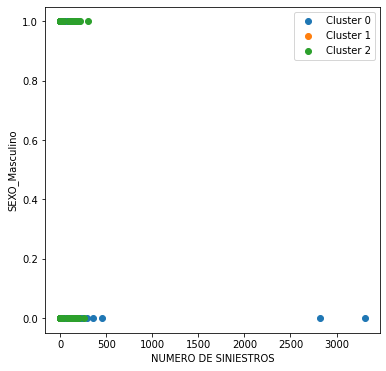

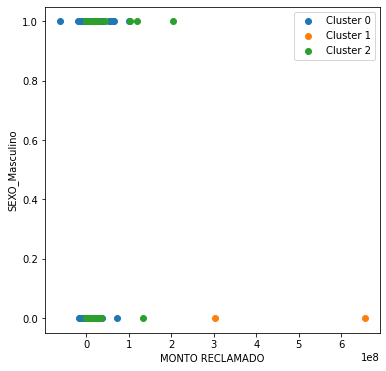

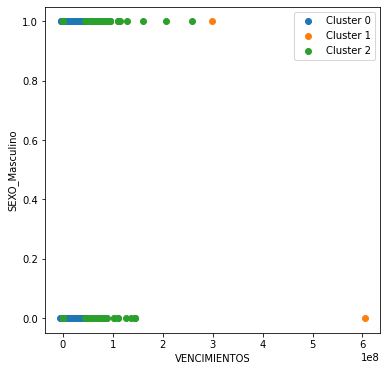

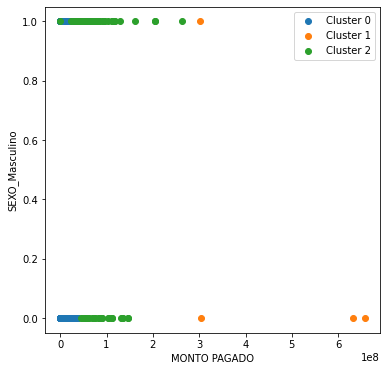

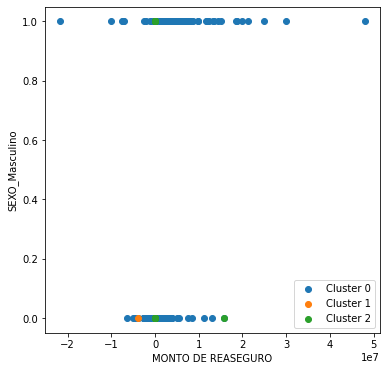

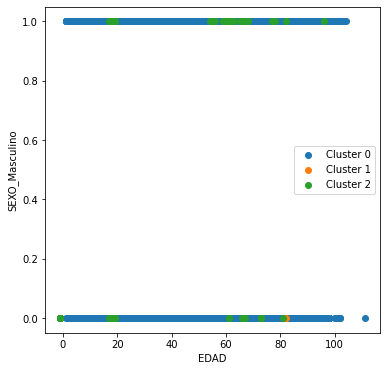

In [29]:
X = df[cols]

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

df['cluster'] = kmeans.labels_
for col in cols:
    plt.figure(figsize=(6,6))
    for i in range(3): 
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data[col], cluster_data['SEXO_Masculino'], label=f'Cluster {i}')
    plt.xlabel(col)
    plt.ylabel('SEXO_Masculino')
    plt.legend()
    plt.show()

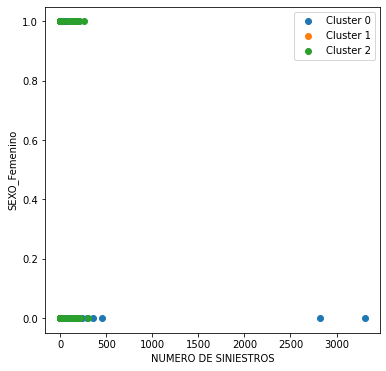

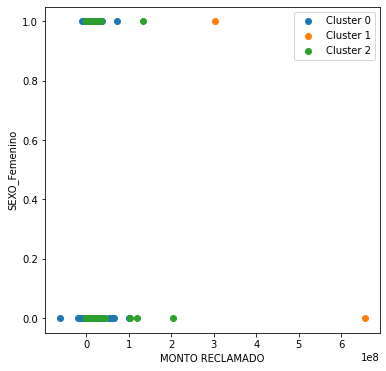

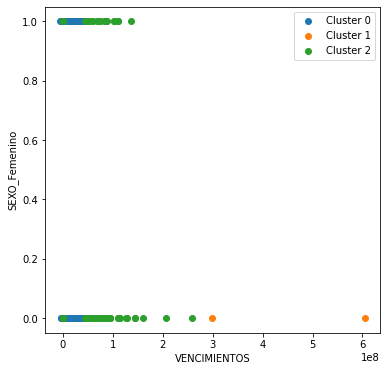

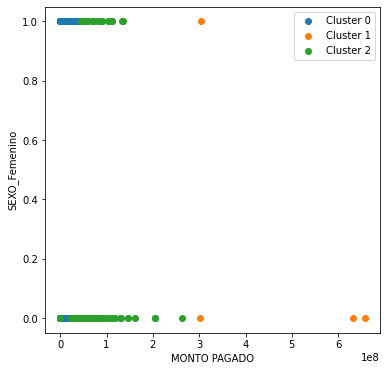

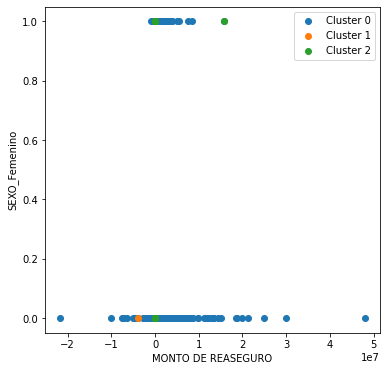

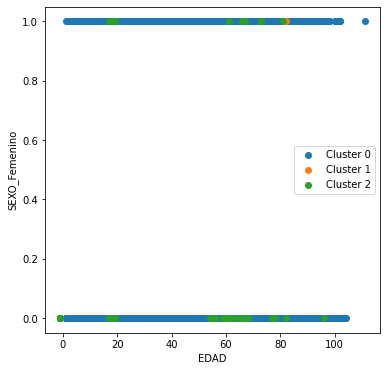

In [30]:
for col in cols:
    plt.figure(figsize=(6,6))
    for i in range(3): 
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data[col], cluster_data['SEXO_Femenino'], label=f'Cluster {i}')
    plt.xlabel(col)
    plt.ylabel('SEXO_Femenino')
    plt.legend()
    plt.show()

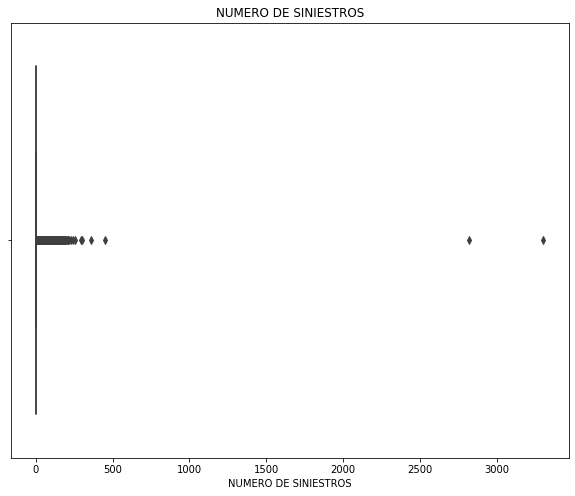

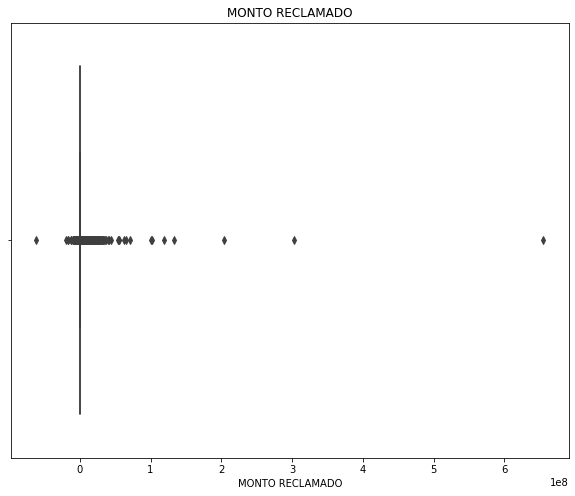

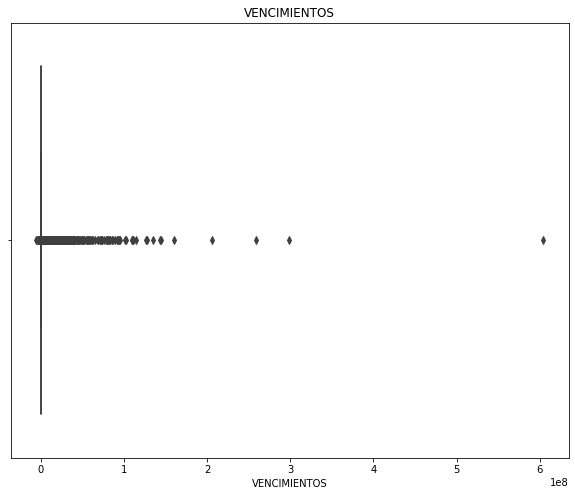

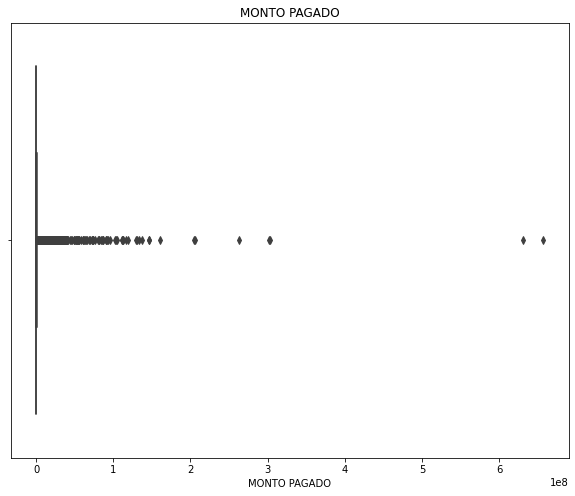

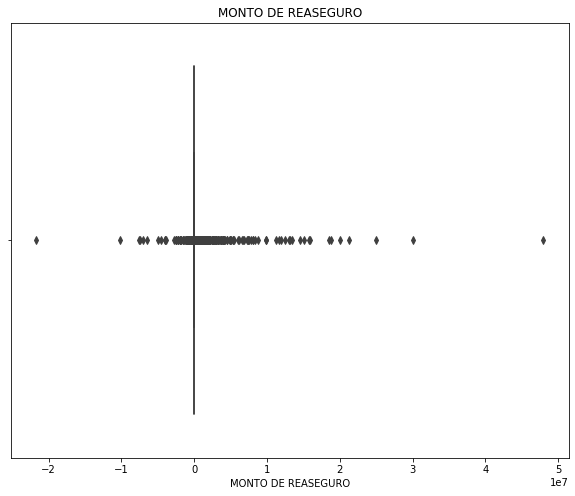

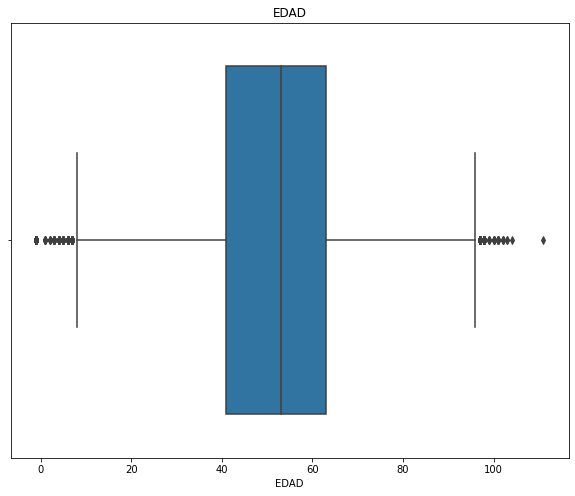

In [31]:
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    plt.show()

In [32]:
for col in cols:
    print(f'Estadística descriptiva para la columna "{col}":')
    print(df[col].describe())
    print('\n')

Estadística descriptiva para la columna "NUMERO DE SINIESTROS":
count   81107.00
mean        2.46
std        17.01
min         1.00
25%         1.00
50%         1.00
75%         2.00
max      3304.00
Name: NUMERO DE SINIESTROS, dtype: float64


Estadística descriptiva para la columna "MONTO RECLAMADO":
count       81107.00
mean       356247.44
std       3053295.36
min     -61776357.00
25%          4690.00
50%         49517.00
75%        260580.00
max     655027699.00
Name: MONTO RECLAMADO, dtype: float64


Estadística descriptiva para la columna "VENCIMIENTOS":
count       81107.00
mean       354594.08
std       3943547.81
min      -5554019.00
25%             0.00
50%             0.00
75%             0.00
max     604214042.00
Name: VENCIMIENTOS, dtype: float64


Estadística descriptiva para la columna "MONTO PAGADO":
count       81107.00
mean       533545.26
std       4779132.70
min             0.00
25%             0.00
50%         46685.00
75%        264005.00
max     656984877.00
Nam